In [1]:
import pandas as pd

df = pd.read_csv(r'creditcard.csv')
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [2]:
X = df.iloc[:,:-1]
y = df['Class']

In [3]:
X.describe().transpose().round(3)

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,94813.86,47488.146,0.000,54201.500,84692.000,139320.500,172792.000
V1,284807.0,0.00,1.959,-56.408,-0.920,0.018,1.316,2.455
V2,284807.0,0.00,1.651,-72.716,-0.599,0.065,0.804,22.058
V3,284807.0,-0.00,1.516,-48.326,-0.890,0.180,1.027,9.383
V4,284807.0,0.00,1.416,-5.683,-0.849,-0.020,0.743,16.875
V5,284807.0,-0.00,1.380,-113.743,-0.692,-0.054,0.612,34.802
V6,284807.0,0.00,1.332,-26.161,-0.768,-0.274,0.399,73.302
V7,284807.0,-0.00,1.237,-43.557,-0.554,0.040,0.570,120.589
V8,284807.0,-0.00,1.194,-73.217,-0.209,0.022,0.327,20.007
V9,284807.0,-0.00,1.099,-13.434,-0.643,-0.051,0.597,15.595


In [4]:
print(y.sum(), '/', len(y))
print(round(y.mean()*100,2),'%')

492 / 284807
0.17 %


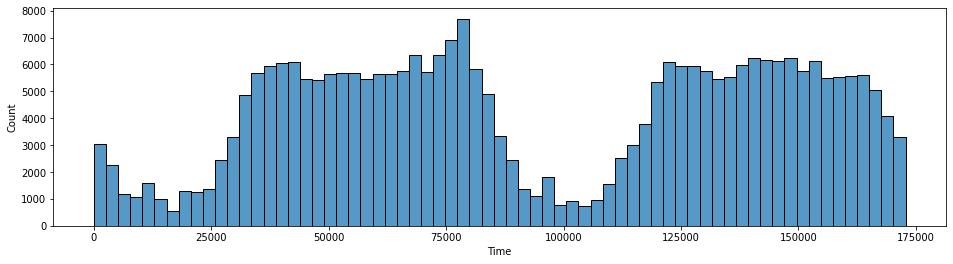

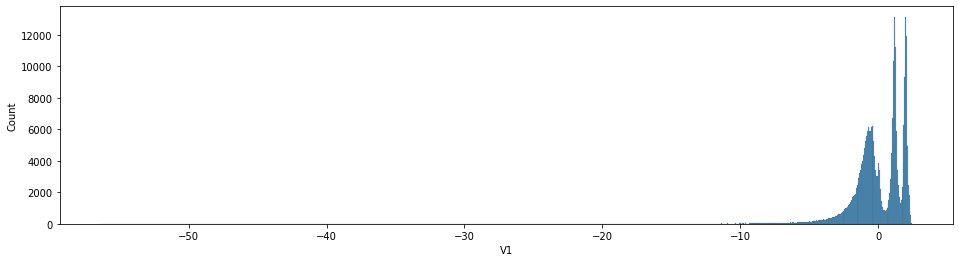

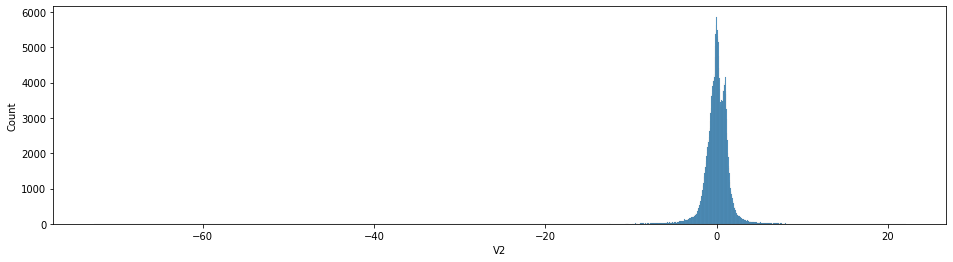

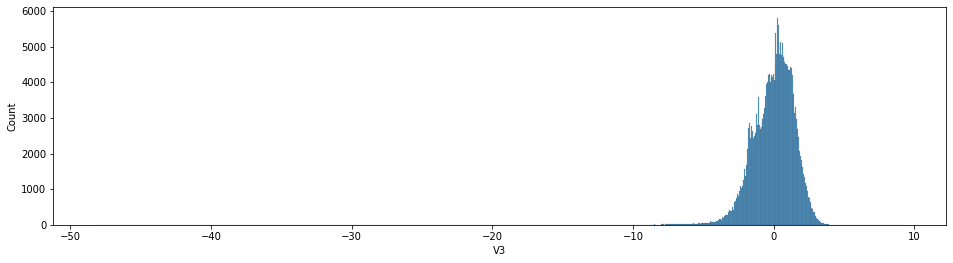

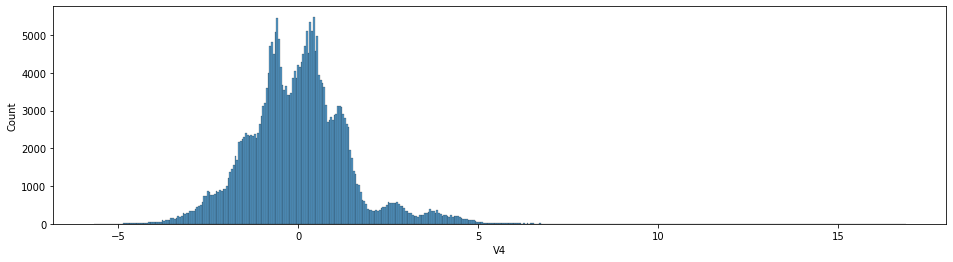

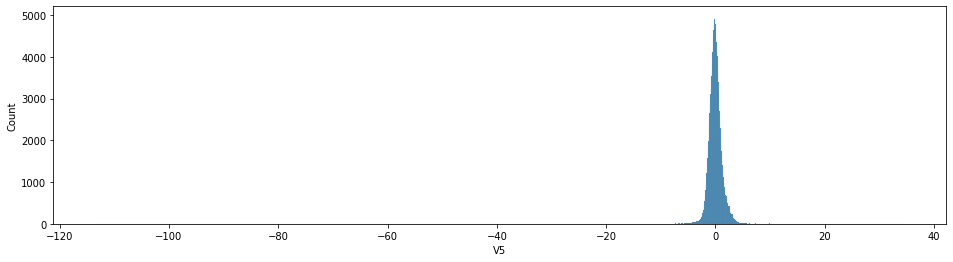

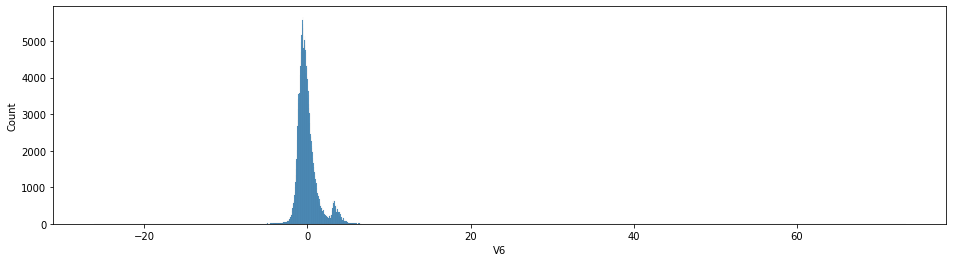

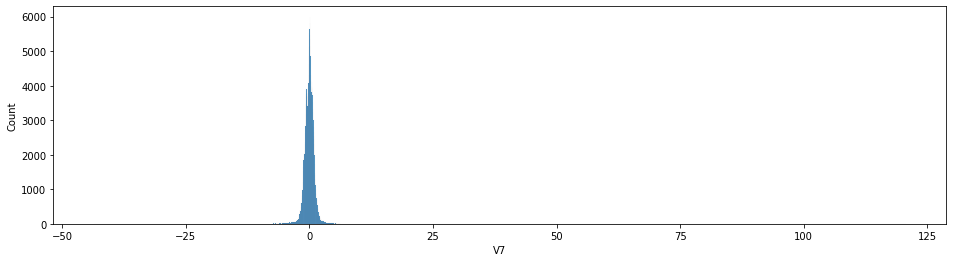

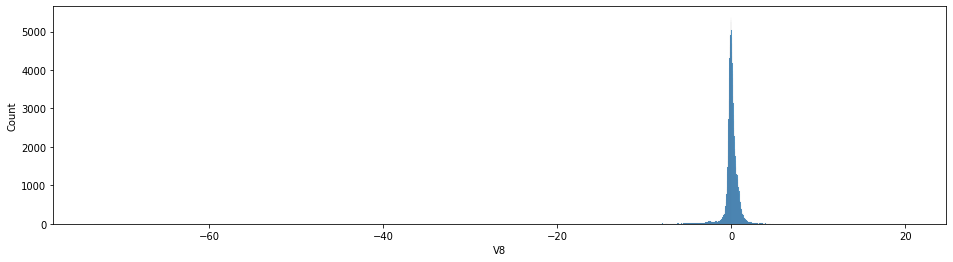

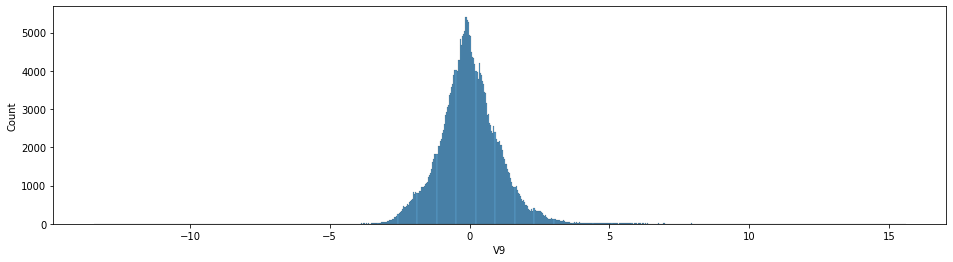

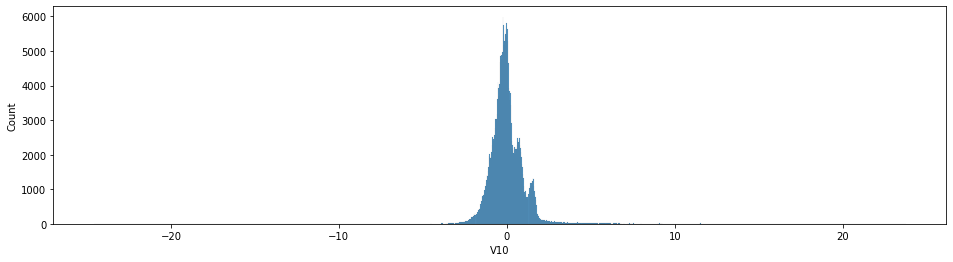

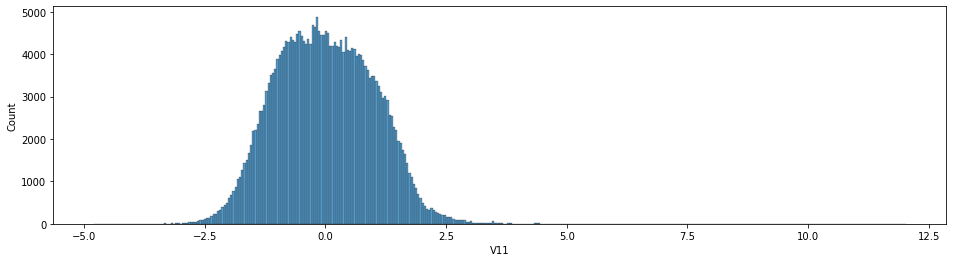

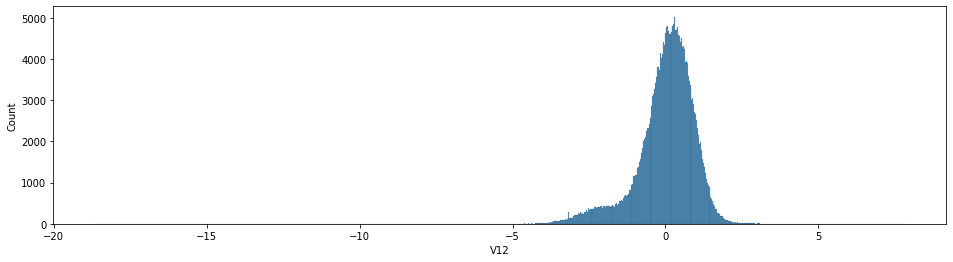

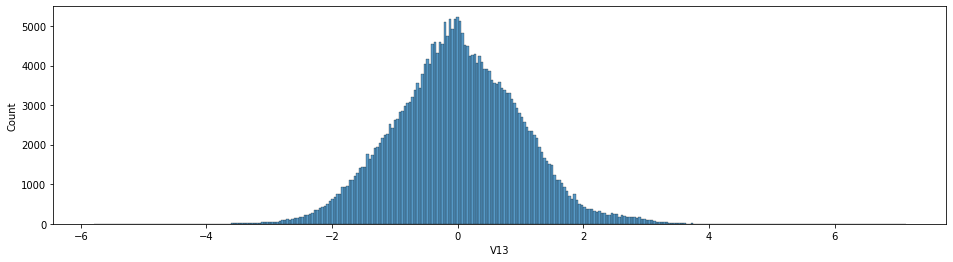

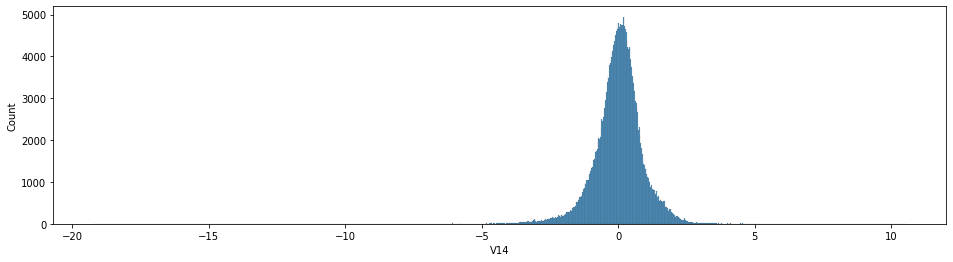

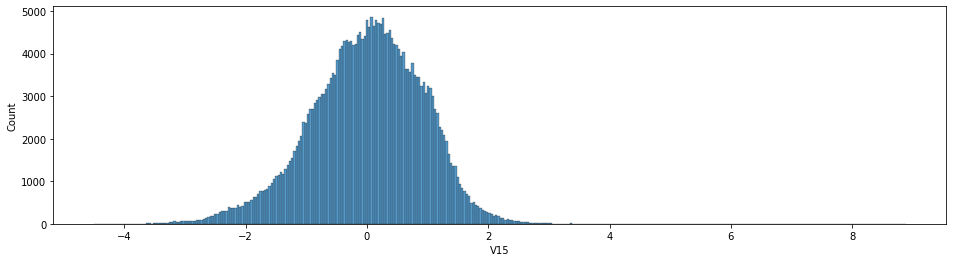

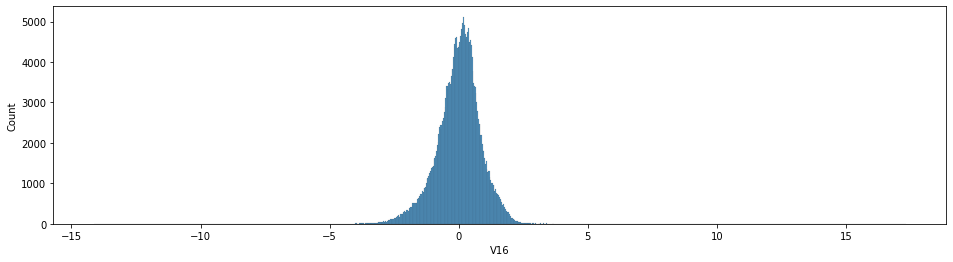

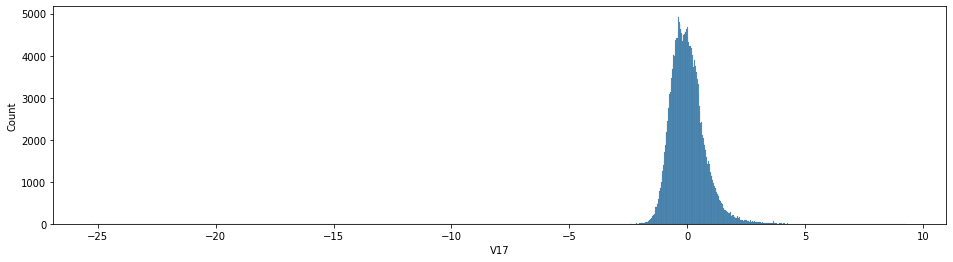

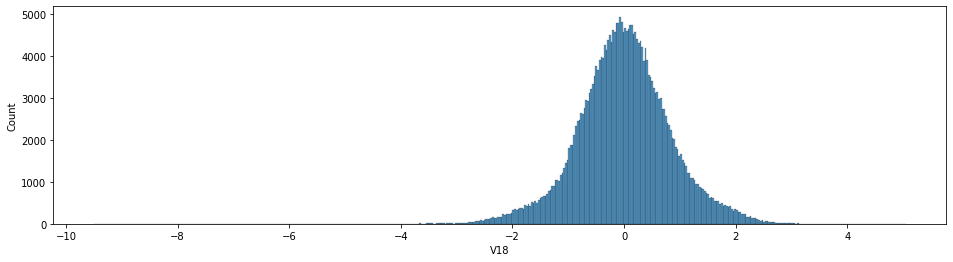

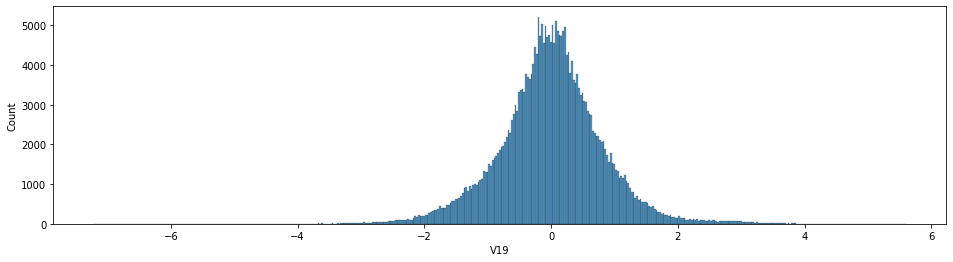

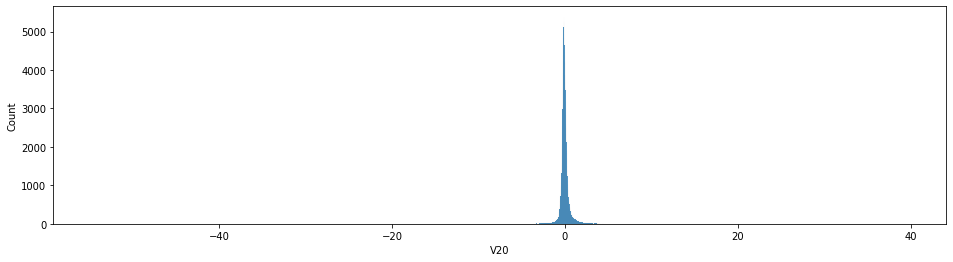

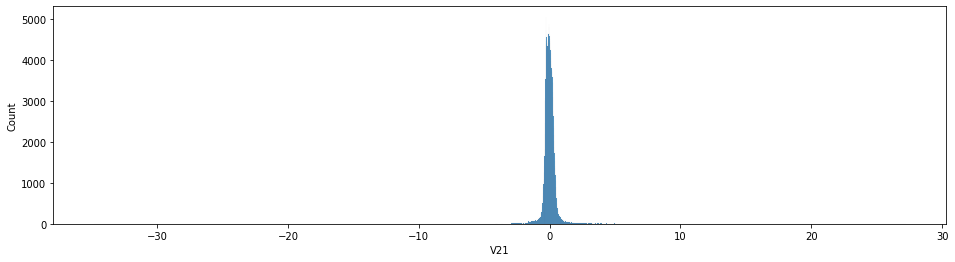

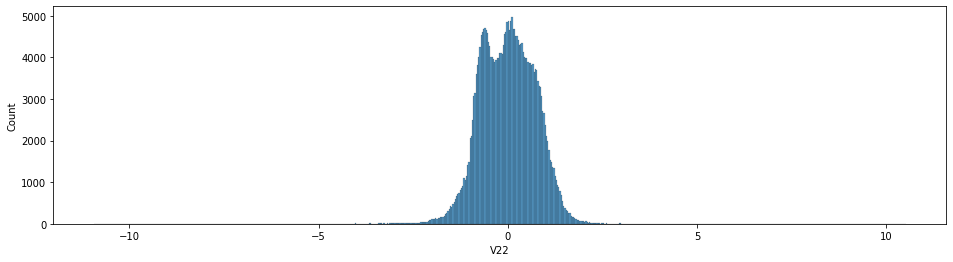

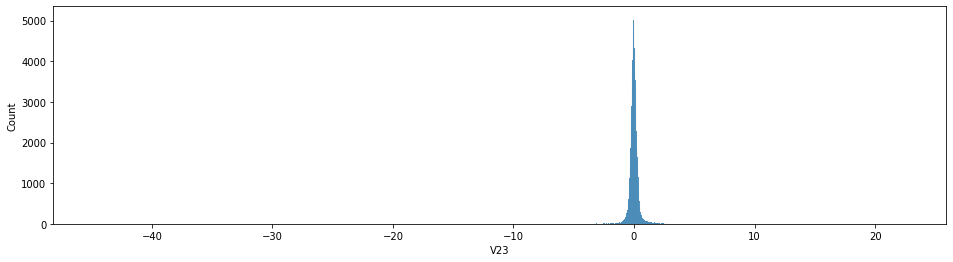

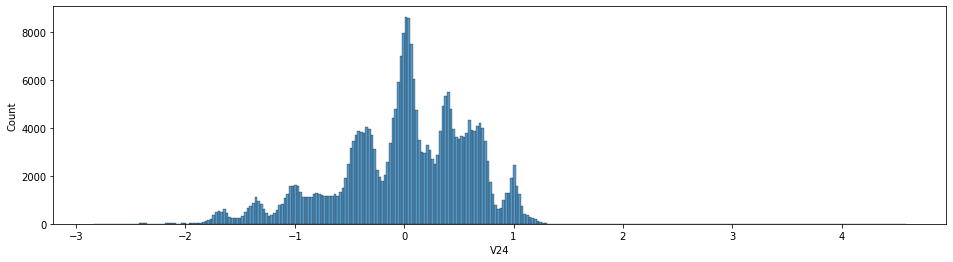

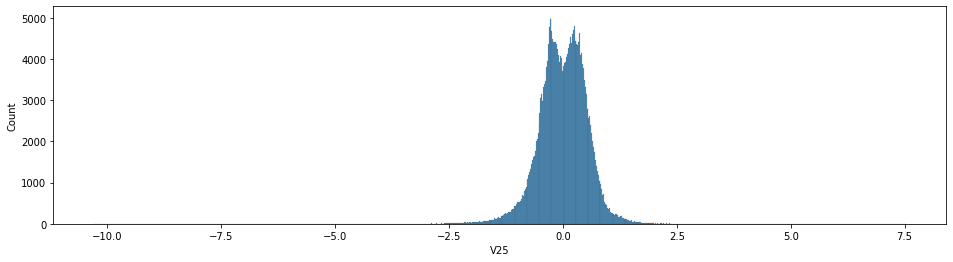

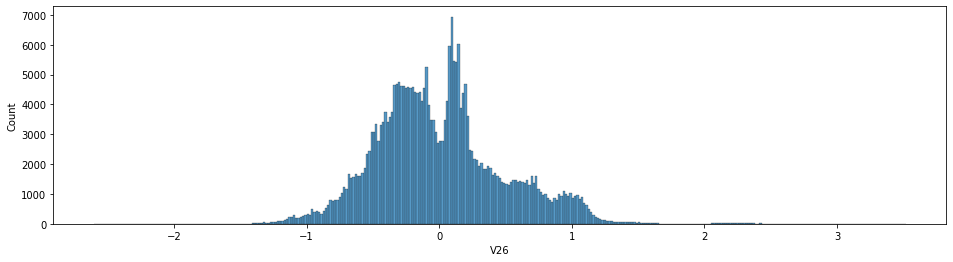

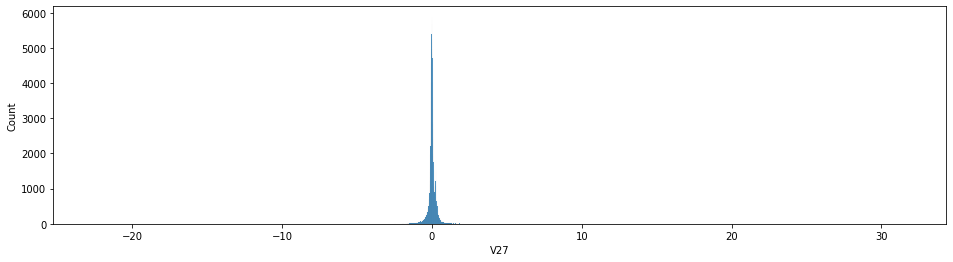

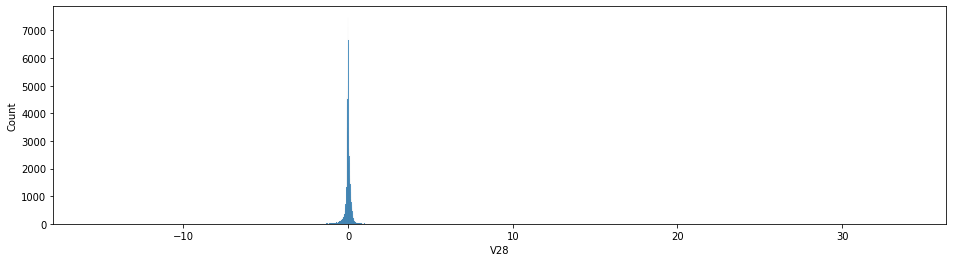

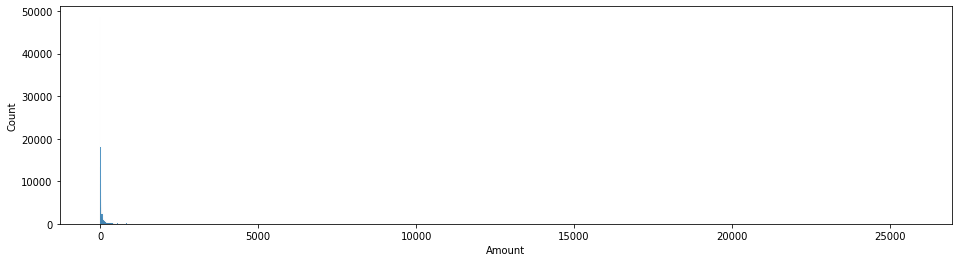

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

for col in X.columns:
    plt.figure(figsize = (16,4))
    sns.histplot(X[col])
    plt.show()

Text(0.5, 1.0, 'Fraud')

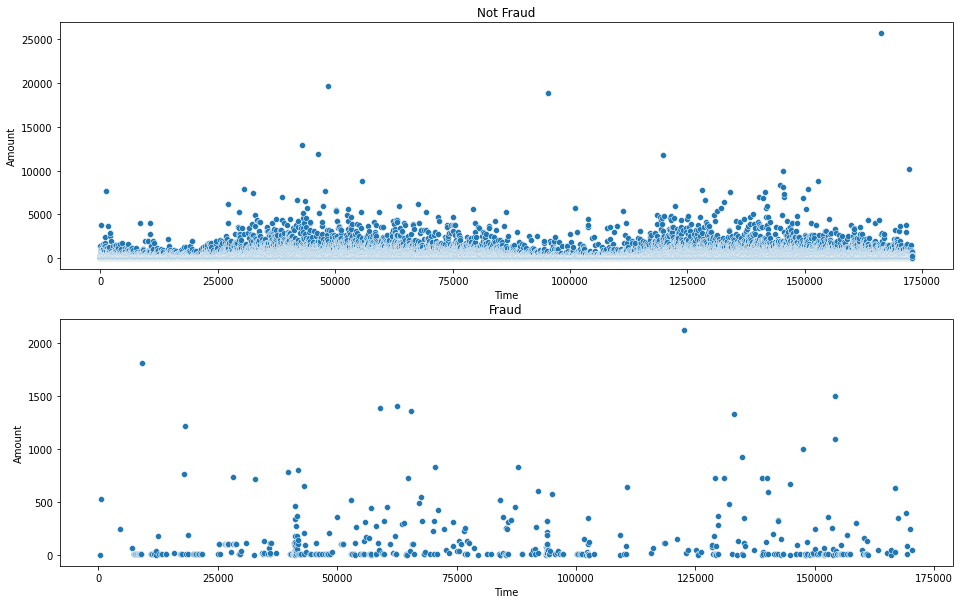

In [5]:
plt.figure(figsize = (16,10))

plt.subplot(211)
sns.scatterplot(x = 'Time', y = 'Amount', data = df[df['Class'] == 0])
plt.title('Not Fraud')
plt.subplot(212)
sns.scatterplot(x = 'Time', y = 'Amount', data = df[df['Class'] == 1])
plt.title('Fraud')

Text(0.5, 1.0, 'Amount under 2500')

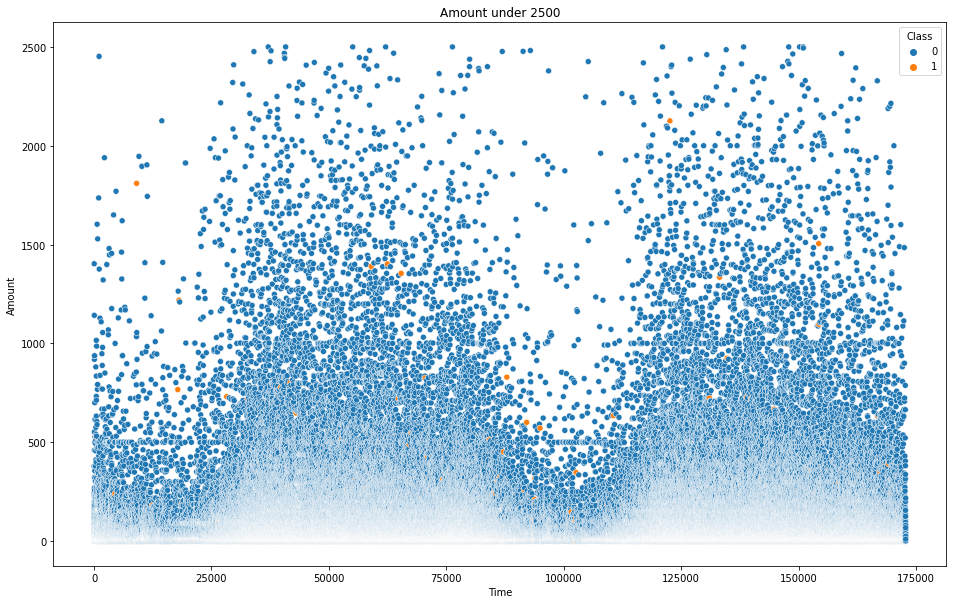

In [6]:
plt.figure(figsize = (16,10))
sns.scatterplot(x = 'Time', y = 'Amount', hue = 'Class', data = df[df['Amount'] <= 2500])
plt.title('Amount under 2500')

<AxesSubplot:>

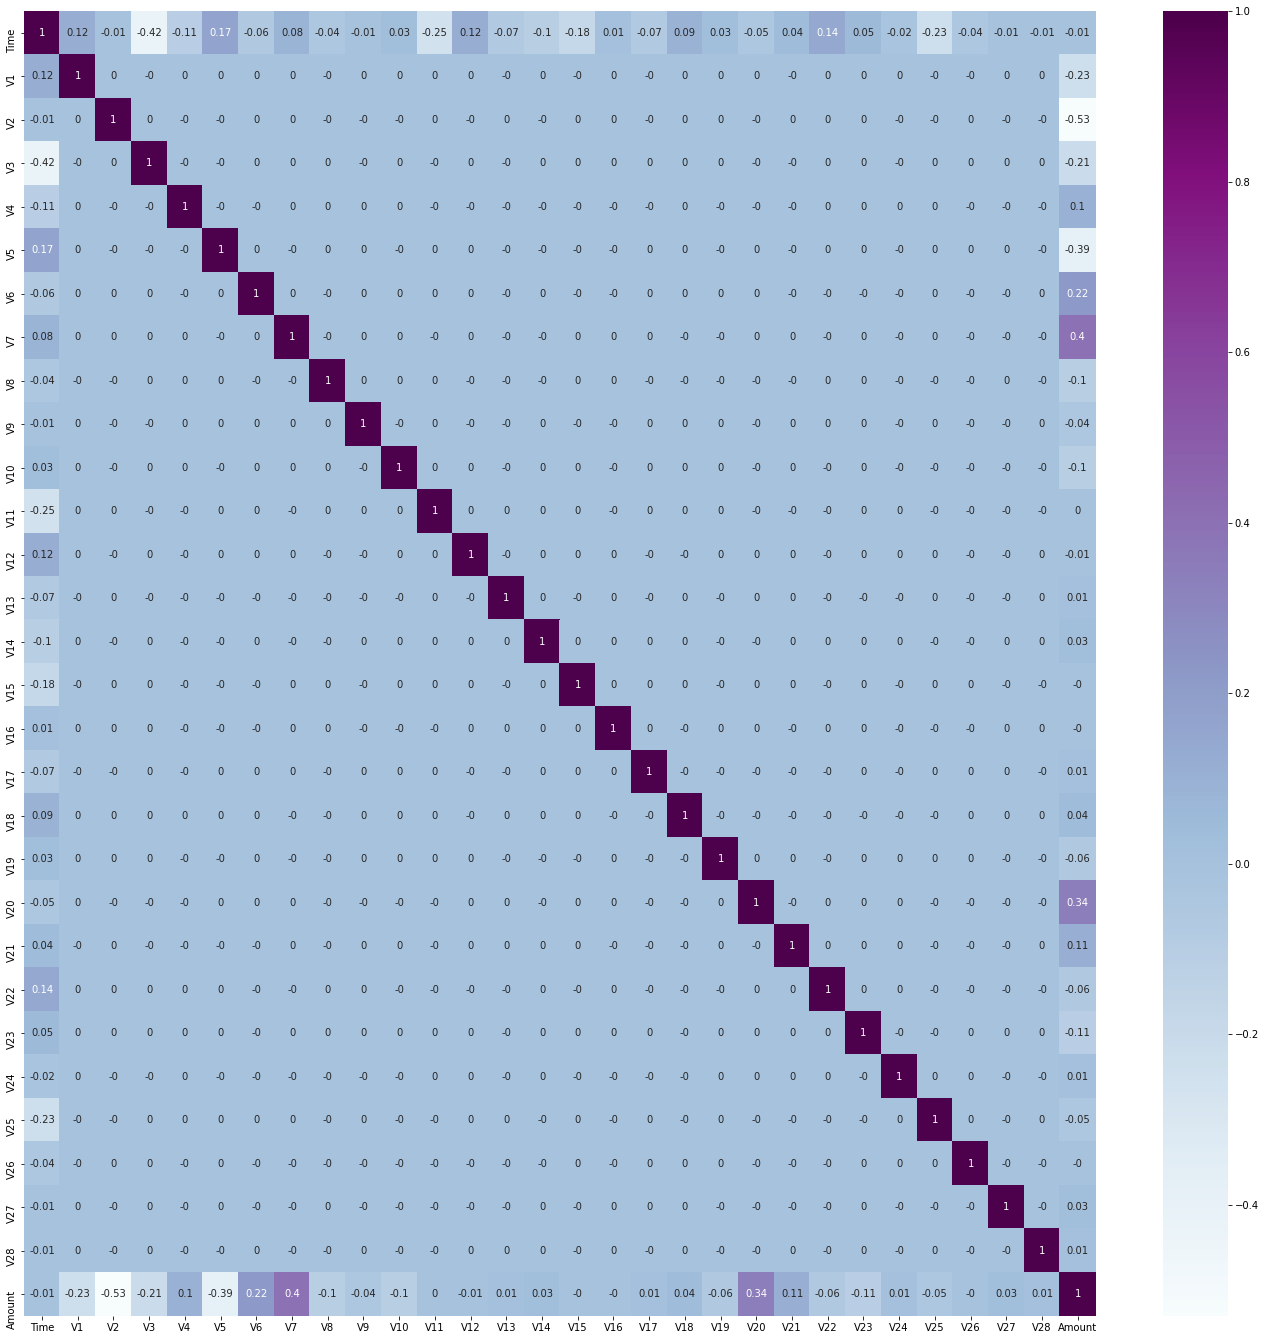

In [7]:
plt.figure(figsize = (24,24))
sns.heatmap(X.corr().round(2), annot = True, cmap = plt.cm.BuPu)

<AxesSubplot:xlabel='Amount', ylabel='V20'>

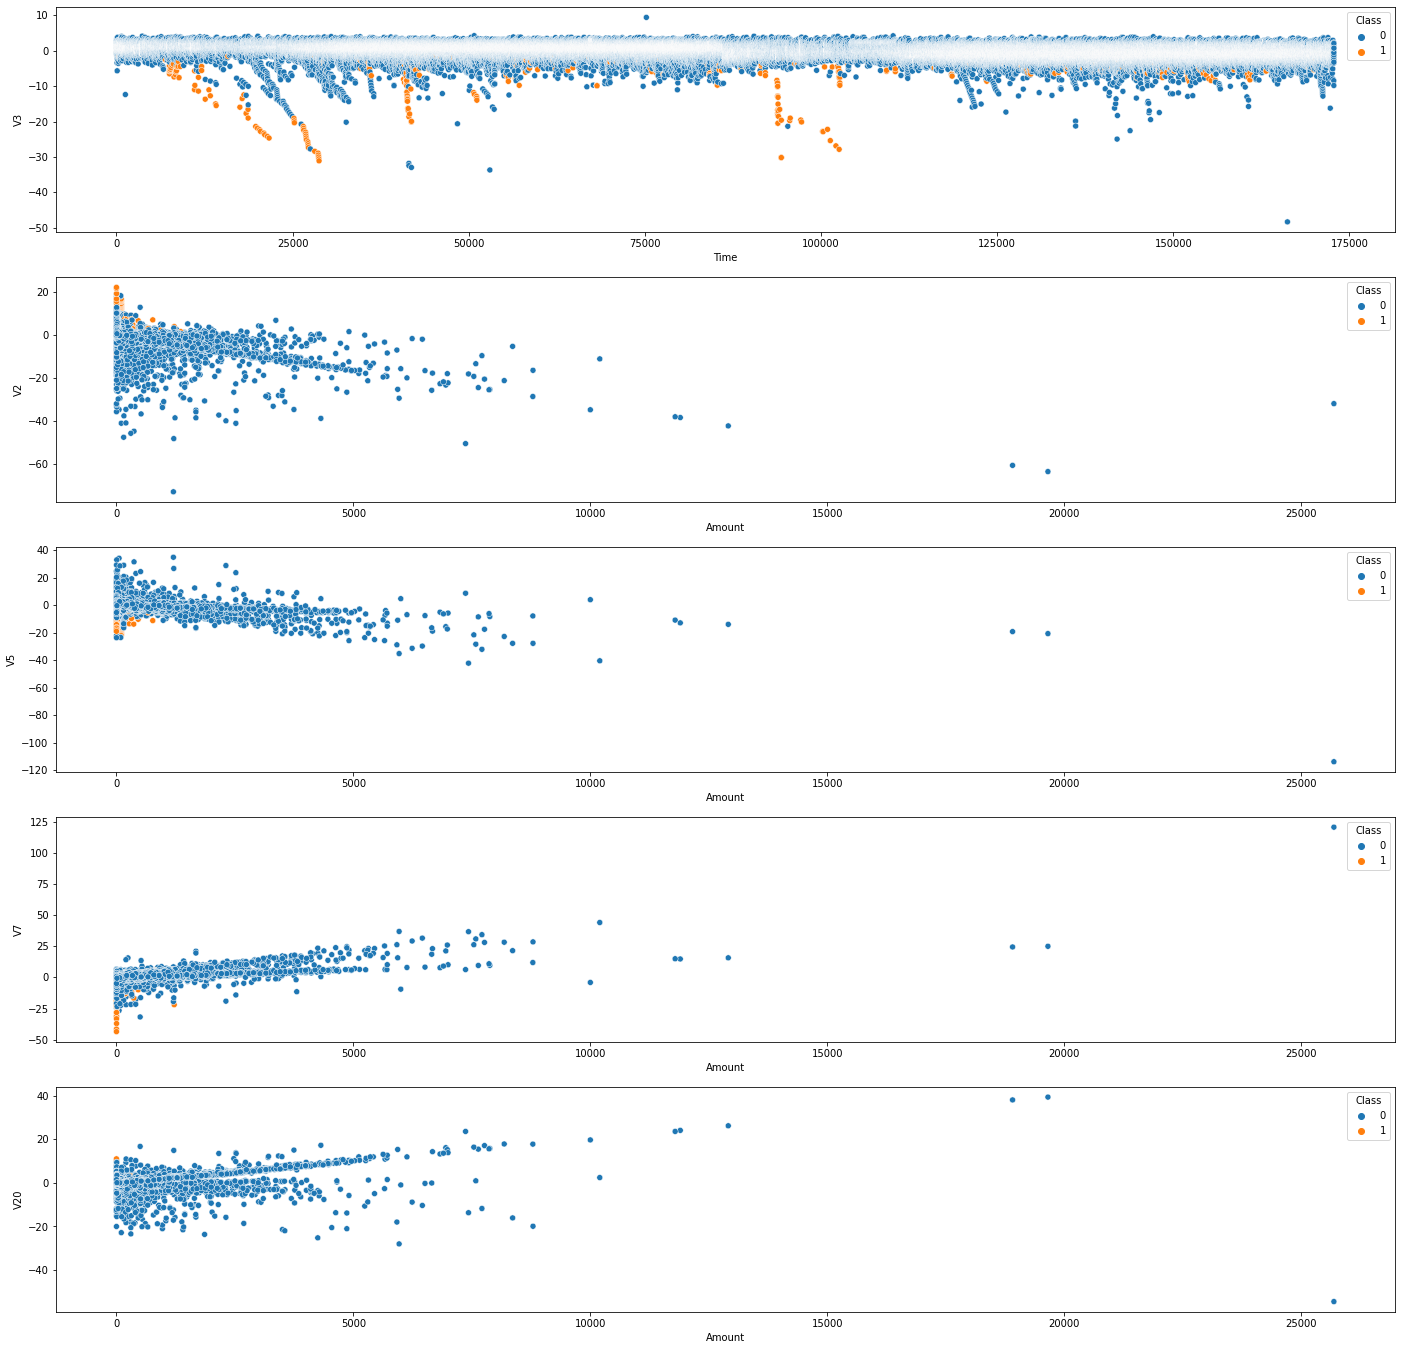

In [8]:
plt.figure(figsize = (24,24))

plt.subplot(511)
sns.scatterplot(x = 'Time', y = 'V3', hue = 'Class', data = df)

plt.subplot(512)
sns.scatterplot(x = 'Amount', y = 'V2', hue = 'Class', data = df)

plt.subplot(513)
sns.scatterplot(x = 'Amount', y = 'V5', hue = 'Class', data = df)

plt.subplot(514)
sns.scatterplot(x = 'Amount', y = 'V7', hue = 'Class', data = df)

plt.subplot(515)
sns.scatterplot(x = 'Amount', y = 'V20', hue = 'Class', data = df)


In [16]:
from scipy import stats
Welch_df = pd.DataFrame(columns = ['column', 'Welch_p', 'mean_0', 'mean_1', 'std_0', 'std_1'])
for col in X:
    sig = {}
    sig['column'] = col
    sig['mean_0'] = df[df['Class'] == 0][col].mean()
    sig['mean_1'] = df[df['Class'] == 1][col].mean()
    sig['std_0'] = df[df['Class'] == 0][col].std()
    sig['std_1'] = df[df['Class'] == 1][col].std()
    sig['Welch_p'] = stats.ttest_ind(df[df['Class'] == 0][col],
                                     df[df['Class'] == 1][col],
                                     equal_var = False)[1]
    Welch_df = Welch_df.append(sig, ignore_index = True)

In [17]:
Welch_df.round(3)

,column,Welch_p,mean_0,mean_1,std_0,std_1
0,Time,0.000,94838.202,80746.807,47484.016,47835.365
1,V1,0.000,0.008,-4.772,1.930,6.784
2,V2,0.000,-0.006,3.624,1.636,4.291
3,V3,0.000,0.012,-7.033,1.459,7.111
4,V4,0.000,-0.008,4.542,1.399,2.873
5,V5,0.000,0.005,-3.151,1.357,5.372
6,V6,0.000,0.002,-1.398,1.330,1.858
7,V7,0.000,0.010,-5.569,1.179,7.207
8,V8,0.063,-0.001,0.571,1.161,6.798
9,V9,0.000,0.004,-2.581,1.089,2.501
